In [5]:
def flower_trend(station, start_year, end_year):
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import matplotlib.font_manager as fm
    import warnings
    warnings.filterwarnings(action='ignore')
    
    # handling error for Korean font
    path = 'C:/Windows/Fonts/malgun.ttf'
    font_name = fm.FontProperties(fname=path, size=15).get_name()
    plt.rc('font', family=font_name)
    
    # make array of
    years = np.array(range(start_year, end_year+1))
    
    # set station name for printing in Korean
    if station == "Seoul":
        station_name = "서울"
    elif station == "Gwangji":
        station_name = "광주"
    elif station == "Busan":
        station_name = "부산"
    elif station == "Daegwallyeong":
        station_name = "대관령"
    elif station == "Jeju":
        station_name = "제주"
    else:
        station_name = "청주"
    
    
    # read data
    file = pd.read_excel("flower.xlsx")
    station = file[station]
    station_data = np.array(station)


    # convert missing value to 0
    nan = np.isnan(station_data)
    station_data[nan] = 0
    

    # plot observation value
    fig = plt.figure(figsize=(10, 5))
    plt.grid()
    plt.plot(years, station_data, linewidth=3, marker="o")

    # plot trend
    z = np.polyfit(years, station_data, 1)
    print(z)
    p = np.poly1d(z)
    print("linear regression eq. : y = ", p)
    plt.plot(years, p(years), "r--", color="red", label="추세선")
    plt.legend(fontsize=13)

    # set details
    plt.title(station_name+"의 연도별 벚꽃 개화시기 편차", fontsize=15, fontweight='bold')
    plt.text(-0.05, 0.05, ("y =" + str(p).strip()), transform=fig.transFigure,
            fontsize=12, fontweight='bold',
            bbox = dict(boxstyle='square',
                        color='gray',
                        fill=True,
                        alpha=0.5,
                        linewidth=1.5))
    
    plt.ylabel("평년값 대비", fontsize=13, fontweight='bold')
    plt.xlabel("년도", fontsize=13, fontweight='bold')
    
    plt.rcParams['axes.unicode_minus'] = False
    plt.show()


[-1.94599303e-01  3.88954704e+02]
linear regression eq. : y =   
-0.1946 x + 389


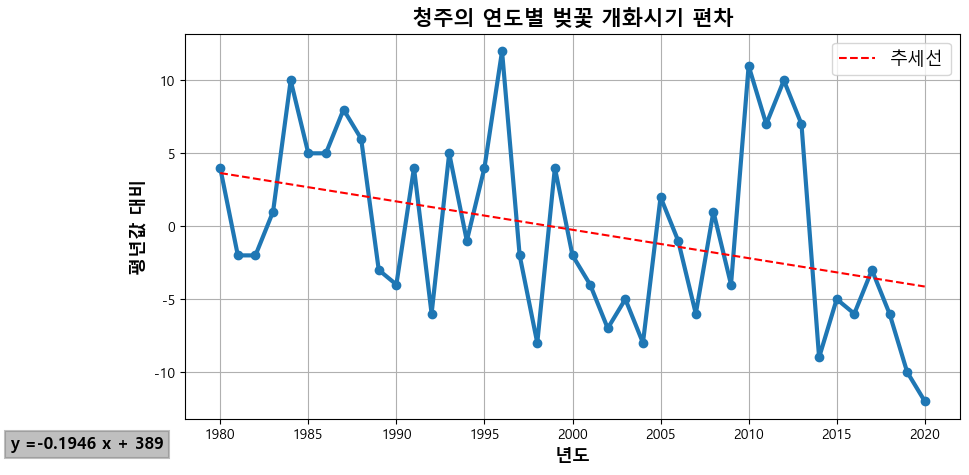

In [6]:
file_name = "flower.xlsx"
start_year = 1980
end_year = 2020
station = "Cheongju"

flower_trend(station, start_year, end_year)

In [12]:
def plot_futuretrend(station):
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import matplotlib.font_manager as fm
    
    # handling error for Korean font
    path = 'C:/Windows/Fonts/malgun.ttf'
    font_name = fm.FontProperties(fname=path, size=15).get_name()
    plt.rc('font', family=font_name)
    
    # set station name for printing in Korean
    if station == "Seoul":
        station_name = "서울"
    elif station == "Gwangju":
        station_name = "광주"
    elif station == "Busan":
        station_name = "부산"
    elif station == "Daegwallyeong":
        station_name = "대관령"
    elif station == "Jeju":
        station_name = "제주"
    else:
        station_name = "청주"
    
    
    # read data
    file = pd.read_excel("flower.xlsx")
    station = file[station]
    station_data = np.array(station)
    print(station_data)
    
    
    # convert missing value to 0
    nan = np.isnan(station_data)
    station_data[nan] = 0
  
    
    # calculate future trend value
    hist_years = np.arange(1980, 2020+1)
    print(hist_years)
    z = np.polyfit(hist_years, station_data, 1)
    p = np.poly1d(z)
    
    future_years = np.arange(2021, 2050+1)
    future_trend = []
    for year in future_years:
        y = p(year)
        future_trend.append(y)
        
        
    # plot trend
    diff_2050 = abs(int(np.round(future_trend[-1])))
            
    fig = plt.figure(figsize=(10, 5))
    plt.grid(True)
    plt.plot(future_years, future_trend, linewidth=3)
    
    
    # plot text
    plt.text(-0.05, 0.05, ("추세선 : \n y =" + str(p).strip()),
             fontsize=12, fontweight='bold', transform = fig.transFigure,
             bbox = dict(boxstyle='square',
                         color='gray',
                         fill=True,
                         alpha=0.5,
                         linewidth=1.5
                         ))
    
    length = future_trend[0] - future_trend[-1]
    plt.plot((2050, 2050), (future_trend[-1], future_trend[-1]+length/2), '--o', color='red', linewidth=3)
    
    t2 = plt.text(0.545, 0.49, "2050년 %s의 벚꽃 개화\n%s일 앞당겨짐"%(station_name, diff_2050),
                    transform=fig.transFigure,
                    fontsize=14, fontweight='bold', ma='center')
    t2.set_bbox(dict(color='red', boxstyle='round', linewidth=3, fill=False))
    
    
    # set details
    plt.title("%s의 벚꽃 개화시기 미래 전망"%station_name, fontsize=17, fontweight='bold')
    plt.ylabel("평년값 대비", fontsize=13, fontweight='bold')
    plt.xlabel("년도", fontsize=13, fontweight='bold')
    
    # plt.rcParams['axes.unicode_minus'] = False

        


[ 4  3 -5  3 13  7  5  1  7  1 -7  8 -3  1  3 -2 10 -5 -4  0  3 -3 -7 -2
 -7  6 -1 -3 -3 -8  2  4  8 -7 -3  0  0  0 -1 -6 -5]
[1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993
 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007
 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]


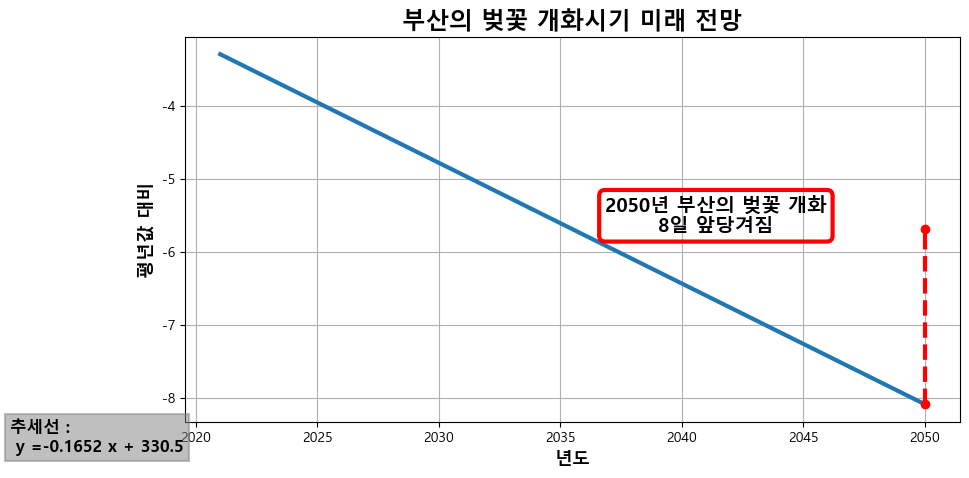

In [13]:
station = "Busan"
plot_futuretrend(station)